In [16]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from rwr_functions import *
from constants import *
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
results = []
for netname in NETWORKS:
    graph = load_graph_nx(netname)
    
    
    for disease in tqdm(DISEASES):
        pegasus_data = load_pegasus_results(disease)
        
        gene_seeds_ncbi, ncbi_targets = load_seeds_and_targets(disease)
        # print(len(gene_seeds_ncbi)==len(set(gene_seeds_ncbi)))
        ncbi_targets = list(set(ncbi_targets))

        score_mapping = {g: 1.0 if g in gene_seeds_ncbi else 0.0 for g in pegasus_data["NCBI_id"]}
        pegasus_data.loc[:, "Score"] = pegasus_data["NCBI_id"].map(score_mapping)
        pagerank_seeds = init_rwr_scores_nx(graph, pegasus_data)

        for alpha in tqdm(ALPHAS):
        # for alpha in tqdm([0.0]):
            rwr_scores = perform_rwr_nx(alpha, graph, pagerank_seeds)
            rwr_results = process_rwr_results_nx(rwr_scores, graph, pegasus_data, pagerank_seeds) 
            for K in Ks:
                metrics = calculate_metrics(rwr_results, K, gene_seeds_ncbi, ncbi_targets, netname, alpha, disease, scoring="Seed")
                results.append(metrics)

results = pd.concat(results)
results

Loading BioPlex3 graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading HumanNet graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading PCNet graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading ProteomeHD graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Loading STRING graph


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.0,Average Precision,20,0.062500,Seed,asthma
0,BioPlex3,0.0,Average Precision,50,0.062500,Seed,asthma
0,BioPlex3,0.0,Average Precision,100,0.049432,Seed,asthma
0,BioPlex3,0.0,Average Precision,20,0.000000,Seed,autism
0,BioPlex3,0.0,Average Precision,50,0.034706,Seed,autism
0,BioPlex3,0.0,Average Precision,100,0.034706,Seed,autism
0,BioPlex3,0.0,Average Precision,20,1.000000,Seed,schizophrenia
0,BioPlex3,0.0,Average Precision,50,0.697917,Seed,schizophrenia
0,BioPlex3,0.0,Average Precision,100,0.540981,Seed,schizophrenia
0,HumanNet,0.0,Average Precision,20,0.000000,Seed,asthma


In [21]:
results.to_csv("outputs/gene_seeds_single_net_metrics_no_prop.csv", index=False)

In [ ]:
results.to_csv("outputs/gene_seeds_single_net_metrics.csv", index=False)

In [14]:
len(gene_seeds_ncbi)

536

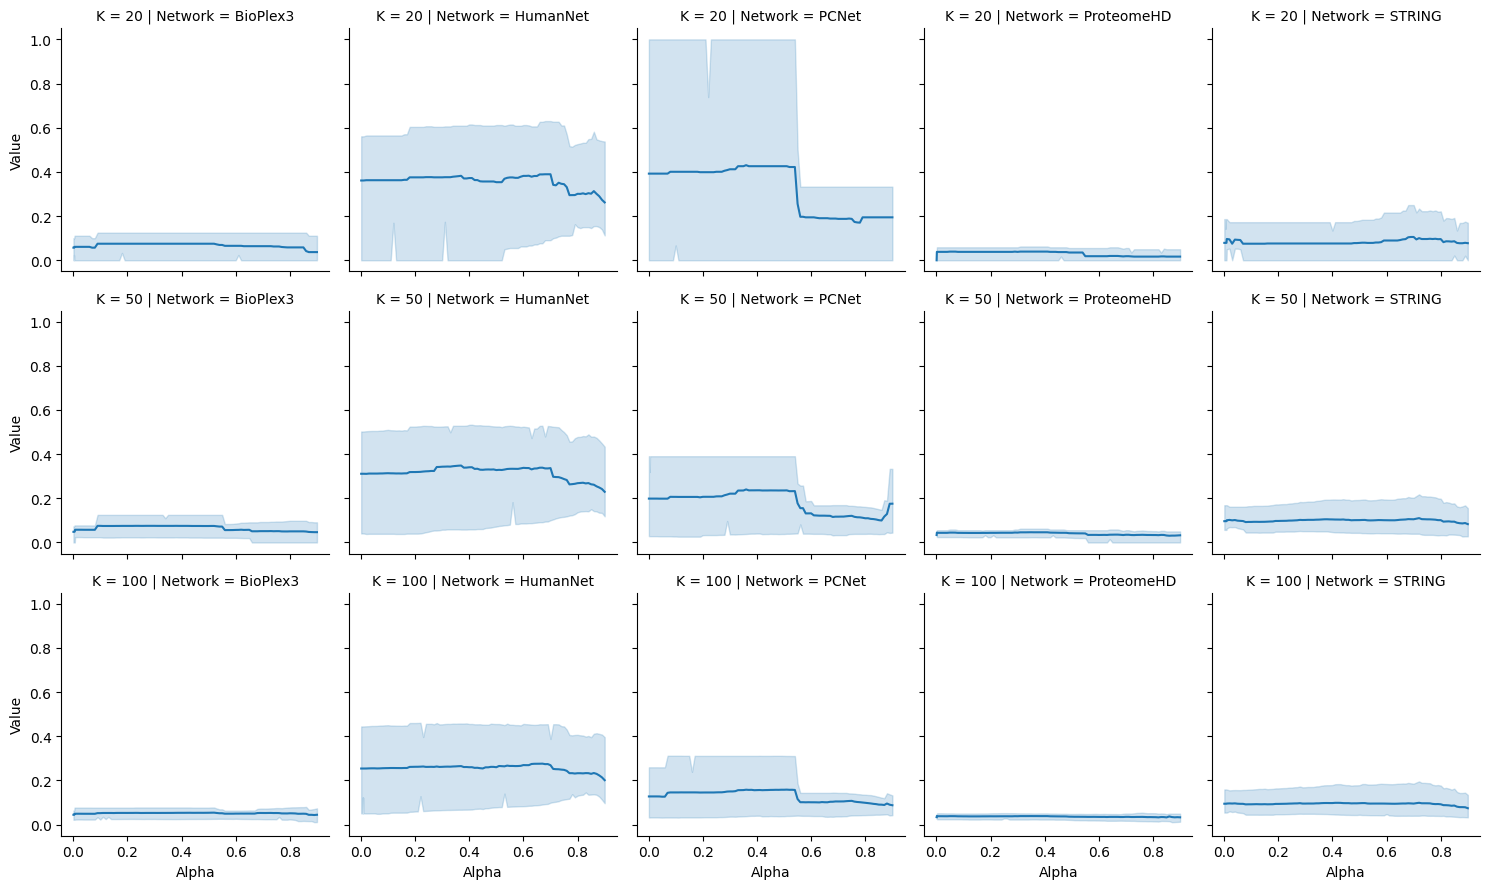

In [15]:

g = sns.FacetGrid(results, col="Network",  row="K", hue="Metric")
g.map(sns.lineplot, "Alpha", "Value")

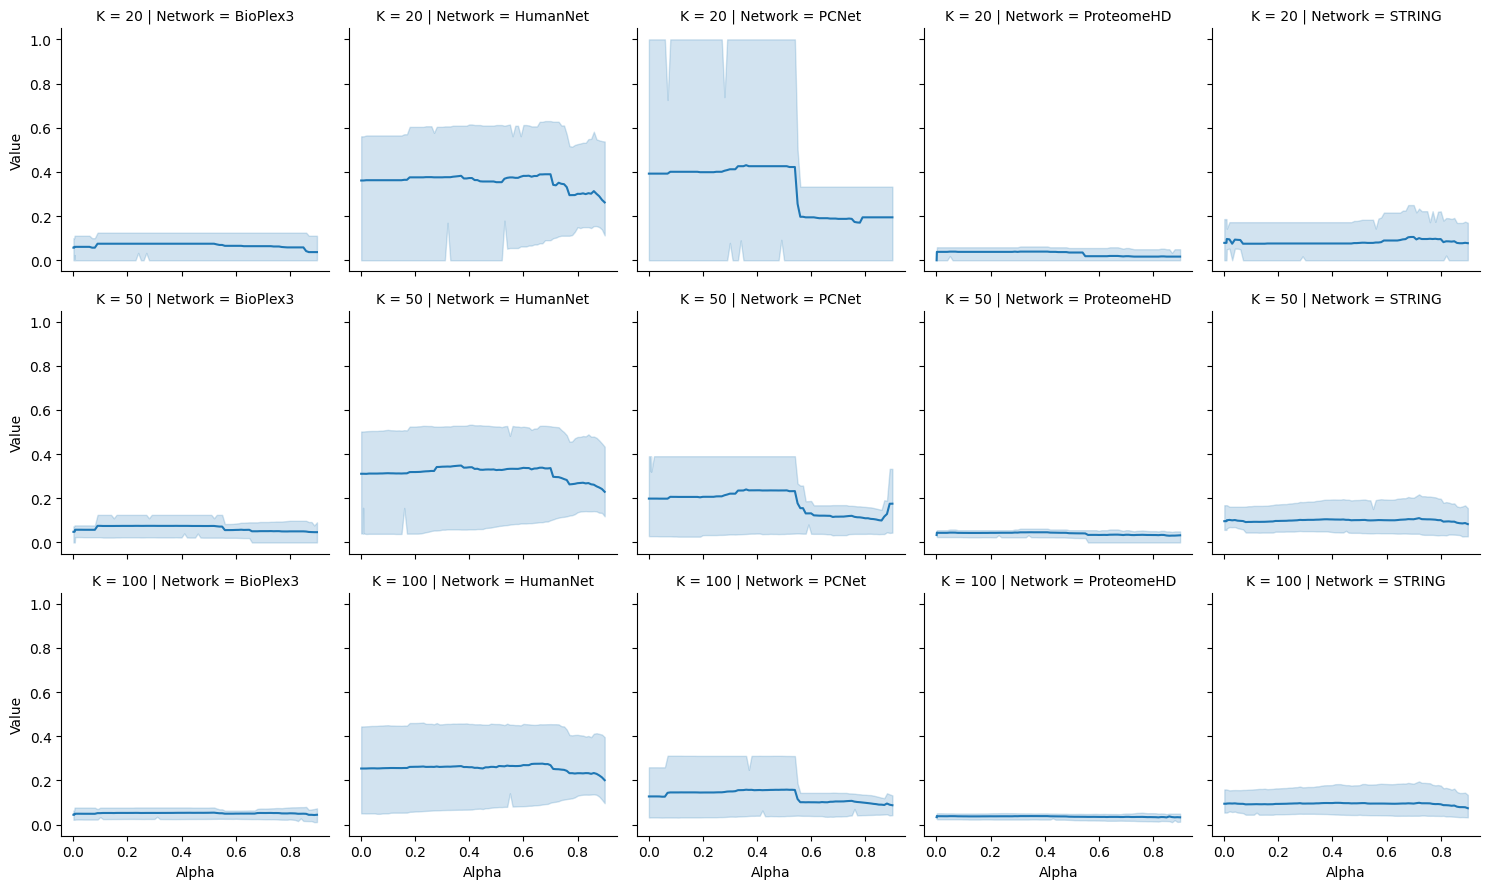

In [6]:

g = sns.FacetGrid(results, col="Network",  row="K", hue="Metric")
g.map(sns.lineplot, "Alpha", "Value")

In [7]:
score_mapping["1401"]

0.0

In [8]:
print(len(gene_seeds_ncbi)==len(set(gene_seeds_ncbi)))


True


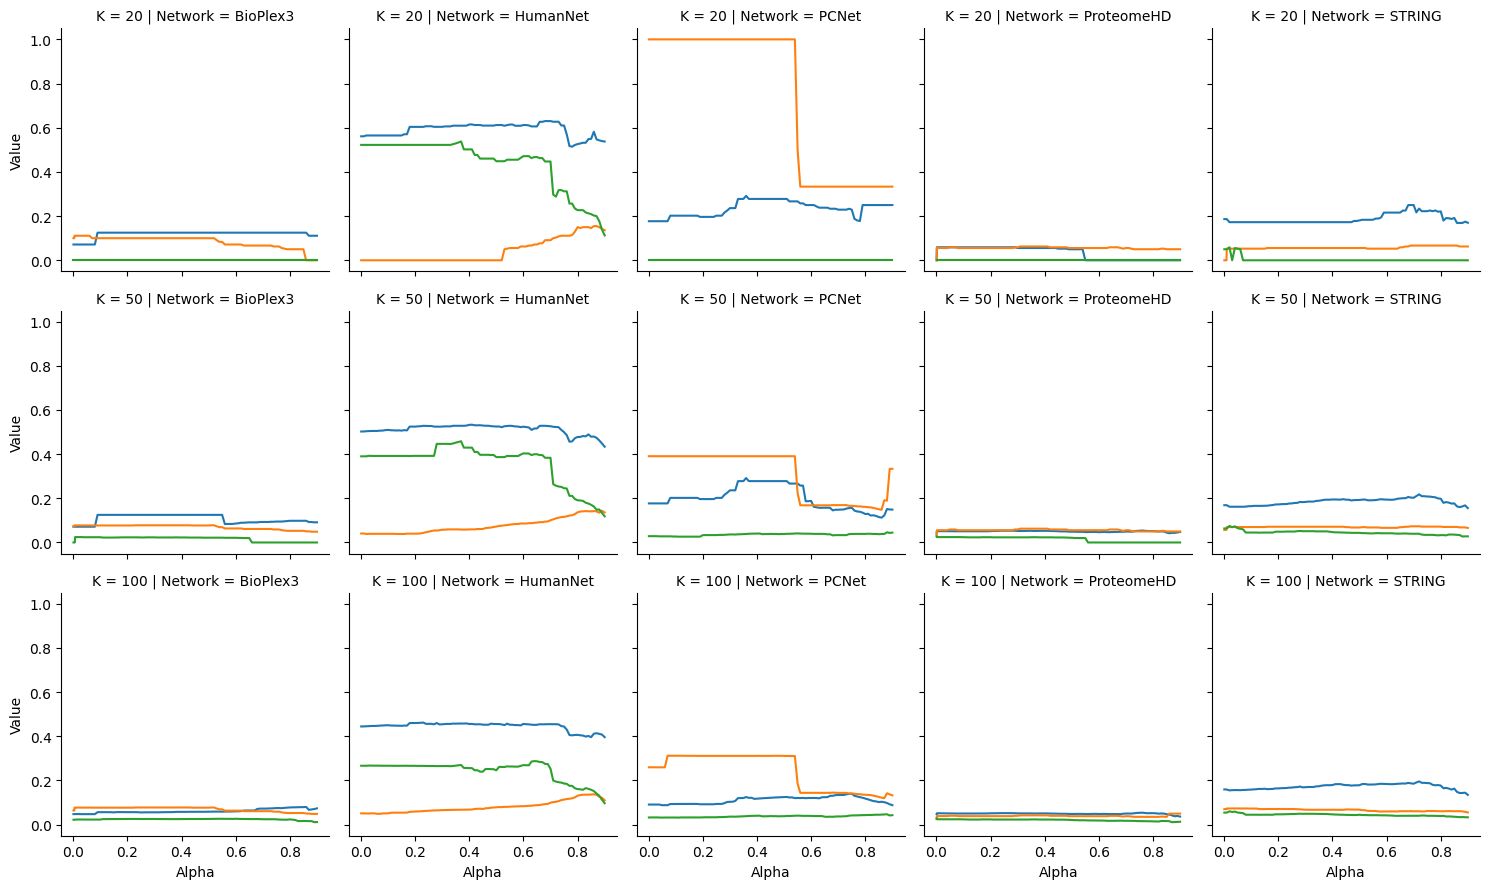

In [9]:

df = results[results["Metric"]=="Average Precision"]
g = sns.FacetGrid(df, col="Network",  row="K", hue="Disease")
g.map(sns.lineplot, "Alpha", "Value")

In [10]:
results

,Network,Alpha,Metric,K,Value,Method,Disease
0,BioPlex3,0.001,Average Precision,20,0.071429,Seed,asthma
0,BioPlex3,0.001,Average Precision,50,0.071429,Seed,asthma
0,BioPlex3,0.001,Average Precision,100,0.047810,Seed,asthma
0,BioPlex3,0.002,Average Precision,20,0.071429,Seed,asthma
0,BioPlex3,0.002,Average Precision,50,0.071429,Seed,asthma
...,...,...,...,...,...,...,...
0,STRING,0.890,Average Precision,50,0.027778,Seed,schizophrenia
0,STRING,0.890,Average Precision,100,0.033894,Seed,schizophrenia
0,STRING,0.900,Average Precision,20,0.000000,Seed,schizophrenia
0,STRING,0.900,Average Precision,50,0.027778,Seed,schizophrenia


In [11]:
np.linspace(0.02, 0.9, 89)

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
       0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.9 ])

In [12]:
np.linspace(0.001, 0.01, 10)

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])